# Uygulama Notları: 9
## FİZ220 - Bilgisayar Programlama II | 09/06/2020

**Fonksiyonlar, Türev ve İntegral**

* Giriş
  * Analitik çözüm de neymiş?..
  * Doğrusu "Entegral" mi, "İntegral" mi, yoksa "Alan hesabı" mı?
* Fonksiyonlar
  * Çok girişli-çıkışlı oturgaçlı götürgeç
* İntegraller
  * Dikdörtgenler sağdan soldan geliyor..
  * Otomatik yapanı yok mu bunun? (scipy.integrate.quad())
* Türevler
  * Türevin formal/resmi tanımı
  * Otomatik yapanı yok mu bunun? (scipy.misc.derivative())
* Ödev (Rutin Grup Ödevi)
* 10000 Puanlık Kişisel Bonus Ödev / "Challenge"

Dr. Emre S. Taşcı, emre.tasci@hacettepe.edu.tr  
Fizik Mühendisliği Bölümü  
Hacettepe Üniversitesi

# Giriş
Her uzmanlıkta, o uzmanlığa dair pek bir şey bilmediğinizi ama yine de bunun *artistlik* yapmanıza engel olmayacağını düşündüğünüzü dahası kötü (~ortaokul seviyesi) bir espri anlayışına sahip olduğunuzu ve dahi çok da çekilesi bir insan olmadığınızı göstermenizi sağlayan birtakım sorular vardır. Örneğin bir İngilizce çevirmenine "what ne demek?" diyebilirsiniz; bir fizikçiye "...sen onu bırak da şimdi ben sana 3 tane kütle versem, onların çözümünü yapabilir misin?" sorusunu yöneltebilir, ya da bir matematikçiden $\int{\frac{\sin x}{x}\,dx}$ integralini almasını isteyebilirsiniz (*Abidin yine iyi kurtarmış bence!.. 8).

Bilgisayarlar için durum biraz daha vahim: espriden anlamamalarının yanı sıra, "Zzzzt ne demek kompodor?" gibi basit bir soruda bile takıldıklarını [önceki derslerimizden de biliyoruz](https://emresururi.github.io/FIZ220/FIZ220_EST_UygulamaNotlari_08_LineerCebir.html). O yüzden bırakın $\int{\frac{\sin x}{x}\,dx}$ integralini, $\int{\cos x\,dx}$ integralini bile alabileceklerinden emin değilim (o sırada, [Wolfram Merkez Üssü'nde Stephen Wolfram bu notları okuyup sinirden saçlarını yolmaktaydı...](https://www.wolframalpha.com/input/?i=integral+cos%28x%29)).

Şaka -ve arsızca çarpıtma- bir yana, sembolik hesaplar yapan pek çok matematik kütüphanesi var: ennnn sayısal çalışan MATLAB / GNU Octave bile uygun modüllerle sembolik hesap desteği kazanıyor, hatta Python'ı da boş geçmeyelim:

In [1]:
from sympy import *
x = Symbol('x')
integrate(cos(x),x)

sin(x)

(insert: "bak, isteyince oluyormuş demek, keh keh..." pişkin gülüşü)

Bilgisayarlarda matematiksel işlemler yaparken aklımızdan çıkarmamız gereken şey, her ne kadar bize doğal gibi gelen sembolik, analitik işlemleri yapıyor gibi görünseler de, aslında her koşul altında sayılarla, sayısal işlemler yapıyor olmaları (ek bilgi: bu işler için sembollere kendi aralarında asal sayılar, bizzat asal sayılar veya doğrudan komple sayılar atamak uygulanan metotlardan biri -- sonrasında sonucu bu sembol değerleri üzerinden yorumlayıp, mümkün mertebe ayrıştırıyorlar).

## Analitik çözüm de neymiş?..
Gene vaktiyle dersimizde bahsettiğimiz üzere, bizler çoğu zaman otomatik olarak, farkına bile varmadan elimizdeki problemleri soyutlamalar ve modellemelerle temsil edip, öyle çözüyoruz. Ama aslında ne kristaller pürüzsüz, ne de [*tavuklar küresel*](https://en.wikipedia.org/wiki/Spherical_cow). Nasıl ki WhatsApp'dan mesaj yazıp, instagram'dan resim paylaşmak için kullandığımız aletlerin potansiyellerinin 100'de 1'i yeterliyse (klişe ama gerçek: o aletlerin çok daha düşük kapasitelisi 50 yıl önce (20 Haziran 1969) aya insan gönderdi), elimizdeki olası bir problemin ("bu akşam ne yemek yapsam?") çözümünün bizi, ailemizi ve misafirlerimizi tatmin etmesi yeterli (Melbourne'da yaşayan John Smith'in (24) yemeğimi takdir edip etmemesi açıkçası pek umurumda değil). Bu kadar laf salatasına neden giriyorum?

$$\int{\cos(x)\,dx}=\sin(x)$$

şeklindeki belirsiz integrallerin çözümü, bütün olası durumlar için **evrensel** olarak geçerlidir. Analitik çözümler mutlak çözümler olup, tartışmaya, manevra alanına yer bırakmaz, sağlamlardır. Ama pahalıdırlar da, her zaman olmayabilirler de. 

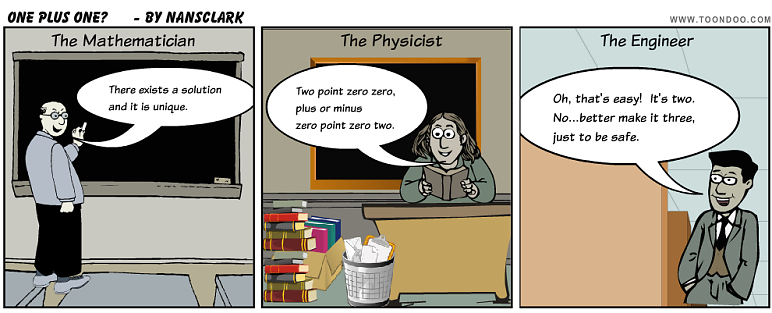  
www.toondos.com imiş (ben Eda'nın ders notlarından arakladım 8)

Mühendislikte mevcut problemlerin çözümleri ile uğraşırız - bu problemler hayali/düşünsel problemler olmayıp, doğrudan gündelik hayatımızda karşılaştığımız sorunlara dairdir. Bu nedenle bulundukları ortamdan, tâbi oldukları koşullardan ayrı düşünülemez. Eğer düşünce kırılmayacak sağlamlıkta bir bardak için malzeme arıyorsak, bu bardağın 1.5, haydi sizin güzel hatrınız için 2 metreden düşünce sağlam kalması bizim için yeterlidir -- gidip de üzerinden dozerle geçilse bile, ya da bir nötron yıldızına yerleştirildiği durumlarda dahi sağlam kalacak bir bardak tasarlamayız. Çalışma aralığımızı tanımlar, o aralıkta ve istenilen hassasiyette işimize bakarız. Yani birisi bizden $\int{f(x)\,dx}$ integralinin değerini istediğinde, "hangi aralıkta (ve hangi hassasiyette)?" sorusunu sormamız gerekir. Analitik çözüme sayısal yöntemlerle yaklaşırken içiniz rahat olsun zira:
1. Elinizdeki sorunun analitik çözümü olmayabilir bile!
2. Çözüme istediğiniz hassasiyette yaklaşabilirsiniz.

Bu "analitik vs. sayısal" kapışmasına çok da girmemek lazım. Siz analitik takılırsınız, örneğin dersiniz ki: $\cos^{-1}(-1) = \pi$, ben de derim ki, "şu metreyi alın da bana şu kumaştan o cevaplık kadar kesin, kravat diktireceğim..." artık 3.14 metre mi kesersiniz, 3.1416 metre mi, ... orasını bilemem ama sizin de pek *analitik* olduğunuz söylenemez o an itibarıyla. ;)

## Doğrusu "Entegral" mi, "İntegral" mi, yoksa "Alan hesabı" mı?
Ben lisanstayken çok sevdiğimiz, süper bir hocamız integral yerine "Entegral" derdi (bunu yetişme çağındayken Frankofon bir dünyada büyümüş olduğuna bağlıyorum, keza "internasyonel" yerine de "enternasyonel" ve "intropi" yerine de "entropi" derdi... deermişim!.. 8P 8). Peki integral, acaba bize lisede öğrettikleri üzere "grafiğin altında kalan alan" mı? Eğer öyleyse "ne kadar?".

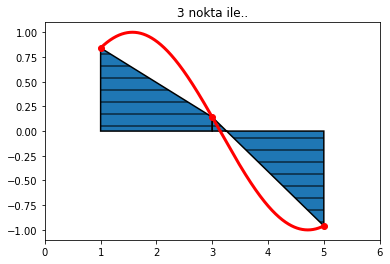

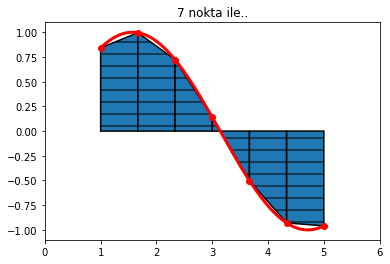

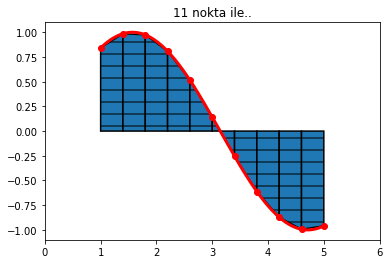

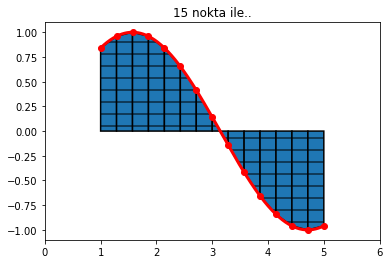

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def f(x):
    f = np.sin(x)
    return f

t = np.linspace(1,5,1000)
t2 = f(t)

for N in range(3,16,4):
    x = np.linspace(1,5,N)
    y = f(x)
    fig,ax = plt.subplots()
    plt.plot(t,t2,"-r",linewidth=3)
    plt.plot(x,y,"or")
    for i in range(N-1):
        poli = Polygon([[x[i],0],[x[i],y[i]],[x[i+1],y[i+1]],[x[i+1],0]],hatch="-",linewidth=1.5,edgecolor="k",)
        ax.add_patch(poli)
    plt.title("{:} nokta ile..".format(N))
    plt.xlim(0,6)
    plt.show()

\- İyi günler, ben ders notlarındaki ilanınız için arıyorum... "Grafiğin altında kalan alanların toplamı..." derken ne diyordunuz? Efendim? *Eksi de olabilir* ne demek?.. Alanlar mı? Peki, anlıyorum, peki, teşekkür ederim, yok, bir başka randevum vardı, şimdi hatırladım, kapatıyorum, iyi günler...

# Fonksiyonlar

İntegrallerle ilgili ontolojik ve pratik tartışmaları daha da ilerletmeden önce, bir mola verip, fonksiyonları anlatmamız iyi olacak: Fonksiyonlar, bildiğiniz fonksiyonlar: verilen bir nesneyi, bir başka nesneye taşıyan otobüs benzeri araçlara fonksiyon diyoruz. Demek ki bir fonksiyonu tanımlarken üç şeyi belirtmemiz lazım:
1. Fonksiyonun adı (kötü ad seçerseniz bilgisayarınız size küsebilir)
2. Girdi olarak ne kullanılacak (giriş parametreleri)
3. Çıkış olarak ne döndürecek (çıkış değerleri)

Python'da fonksiyonlar "define" (tanımla) yükleminden gelen `def` yönergesi ile başlatılan blok içerisinde tanımlanırlar. `def` yönergesinde fonksiyonun adı ve giriş parametresi belirtilir; eğer fonksiyon bir (veya daha çok) değer döndürecekse, bunlar da fonksiyon tanım bloğu içerisinde `return` yönergesi ile döndürülür.

Örnek olarak, verilen bir sayının/dizinin/vektörün/vs.. karesini alan, "karele" adında bir fonksiyon yazalım:

In [3]:
import numpy as np

def karele(x):
    f = x**2
    return f

print(karele(5))

x = np.arange(1,11)
print(karele(x))

v = np.array([3,4])
print(karele(v))
# Python'da vektörlerin düz çarpımının (v1*v2) karşılıklı elemanların çarpımı 
# olduğunu hatırlayın -- bir vektörü kendisiyle skaler çarpmak için:
# np.dot(v,v) 

25
[  1   4   9  16  25  36  49  64  81 100]
[ 9 16]


Python'da fonksiyonların çalışma uzayında ilginç bir yaklaşıma gidilmiştir: pek çok programlama dilinde fonksiyonun tanım bloğu dışındaki değişkenler erişime kapalıyken (erişmek istediğimiz değişkenleri genelde `global` yönergesiyle belirleyip içeriden dışarıya erişime açarız), Python'da "en uygun nasılsa öyle olsun" mantığı yürütülür, kulağa çok korkunç gelse de, işe yaramaktadır. 

Örneklerle açıklamaya çalışalım:

In [4]:
# Örnek 1 : içeriden dışarıya...
a = 5 # Dışarıdaki bir değişken

def fonk1(x):
    return a+x # a değeri fonksiyonda tanımlı
               # olmasa bile doğrudan kullanıyoruz
    
print (fonk1(7))


12


In [5]:
# Örnek 2 : dışarıdaki dururken içeridekini kullanmak
a = 5 # Dışarıdaki bir değişken

def fonk2(x):
    a = 6 # içeride dışarıdaki ile aynı adda
          # bir değişken tanımladık, haydi hayırlısı...
    return a+x

print(fonk2(7))
print(a)

13
5


`fonk2`de görüldüğü üzere, eğer kullandığımız değişken adı halihazırda içeride tanımlıysa, fonksiyonumuzun gözü dışarıdaki değişkenlere gitmiyor, kendininkini kullanıyor. İçeride aynı isimli değişkeni başka bir değerde tanımlasak bile (örneğin burada dışarıdaki a'nın değeri 5 iken, biz fonksiyon tanımı içerisinde onu 6 olarak tanımladık), dışarı çıkıldığı anda her şey unutuluyor: son satırda (fonksiyon tanım bloğunun dışında) a'nın değerini yazdırdığımız zaman bize o bloktaki (yani ana program bloğundaki) değeri olan 5'i döndürmekte.

**Peki dışarıdaki değişkenin değerini gerçekten içeriden değiştirmek istersek?**  
İşte bu çeşit durumlarda, `global` yönergesini kullanıyoruz:

In [6]:
# Örnek 3 : İçeriden dışarıyı kurcalamak
a = 5 # Dışarıdaki bir değişken

def fonk3(x):
    global a
    a = 6 # a'yı içeride tanımladık ama bu tanım
          # global yönergesinden ötürü 
          # dışarıdaki a'yı da etkiledi.
    return a+x

print(fonk3(7))
print(a)

13
6


Burada, tıpkı 2. örnekte olduğu gibi, fonksiyon içerisinde a değerini tanımladık ama bu sefer fonksiyon içerisinde a'yı global bir değişken olarak işaretlediğimiz için, fonksiyonun içerisinde yaptığımız işlemler, dışarıdaki a'yı da etkiledi.

## Çok girişli-çıkışlı oturgaçlı götürgeç
Bir fonksiyon tanımlayalım, verilen iki sayının(/vektörün/dizinin...) tek seferde toplamını ve farkını döndürsün (toplamaya ayrı, çıkarmaya ayrı zaman mı?!..):

In [7]:
def topla_cikar(a,b):
    toplam = a + b
    fark = a - b
    return toplam,fark

top,cik = topla_cikar(3,5)
print("Toplam: ",top)
print("Fark: ",cik)

Toplam:  8
Fark:  -2


Peki, diyelim boş bulunup, dönüşe tek değişken koyduk? Bu durumda, bize sonuç demet (_tuple_) olarak dönecektir (demetlerle ilgili daha fazla bilgi için bkz. [Uygulama Notları #2](https://emresururi.github.io/FIZ220/FIZ220_EST_UygulamaNotlari_02_Listeler_Sozlukler.html))

In [8]:
tekli_donen = topla_cikar(3,5)
print("Dönen değer: ",tekli_donen)
print(tekli_donen[0])
print(tekli_donen[1])

Dönen değer:  (8, -2)
8
-2


# Integraller
Artık fonksiyonlarımızı tanımlayabildiğimize göre, integrallerine de geçebiliriz. Öncelikle düşünelim, fonksiyon neydi?.. (fonksiyon emekti, sevgiydi...)

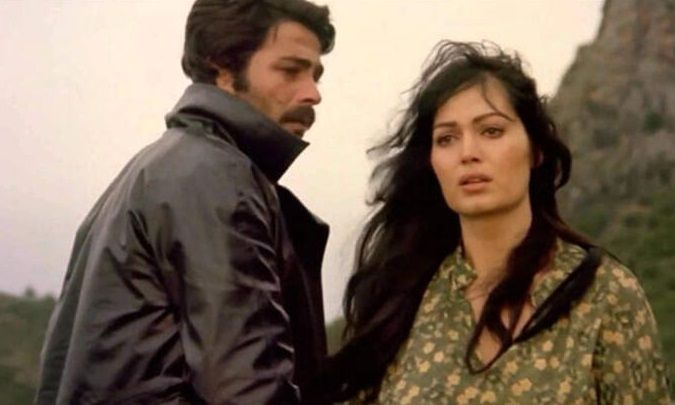 

(Selvi Boylum, Al Yazmalım (1977) - Mutlaka seyretmenizi tavsiye ettiğim bir film!)

İntegrali resmi tanımıyla yazarsak, hedefimizi de açıkça görmüş oluruz:
$$\lim_{\Delta x\rightarrow 0}{\left[{\sum{f(x)\,\Delta x}}\right]} = \int{f(x)\,dx}$$

Sağ tarafı analitikçi optiklere bırakıp, biz sol taraftan ilerleyeceğiz. Bunun için de bol bol yamuk çizeceğiz. *Yamuk da nereden çıktı? Tabanı $\Delta x$, yüksekliği $f(x)$ olan dikdörtgenlerin alanı?..* derseniz de şu sebepten: 


## Dikdörtgenler sağdan soldan geliyor..
Bu seçimde $[x,x+\Delta x]$ aralığının alanını hesaplarken, dikdörtgen yüksekliği olarak $f(x)$ değerini alıyoruz, bu da grafiksel olarak şöyle bir şeye denk geliyor:

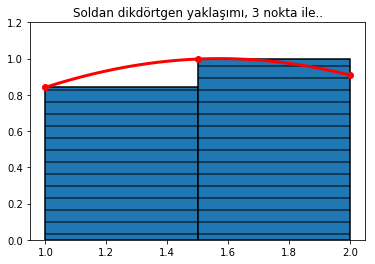

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle,Polygon

def f(x):
    f = np.sin(x)
    return f

x0 = 1
x1 = 2

t = np.linspace(x0,x1,1000)
t2 = f(t)

N = 3

x = np.linspace(x0,x1,N)
delta_x = x[1]-x[0]
y = f(x)

fig,ax = plt.subplots()
plt.plot(t,t2,"-r",linewidth=3)
plt.plot(x,y,"or")
for i in range(N-1):
    dik4sol = Rectangle([x[i],0],delta_x,y[i],hatch="-",linewidth=1.5,edgecolor="k")
    ax.add_patch(dik4sol)
plt.title("Soldan dikdörtgen yaklaşımı, {:} nokta ile..".format(N))
#plt.xlim(0.5,2.5)
plt.ylim(0,1.2)
plt.show()

In [10]:
hayaller=np.sin(1.5)*0.5+np.sin(1)*0.5
gercek=np.cos(1)-np.cos(2)
print(np.sin(1.5)*0.5+np.sin(1)*0.5)
print(np.cos(1)-np.cos(2))
print(hayaller-gercek)

0.9194829857059754
0.9564491424152821
-0.0369661567093067


Bu şekilde yaklaşımda bulunduğumuzda (bir de üstüne duruma kelime anlamı ile _yaklaşıp_ zoom yaptığımızda) görüyoruz ki, 1. aralıkta gerçek değerin altında; 2. aralıkta ise gerçek değerin üstünde bir alan taramışız (halbuki daha iyi olabilirdi).

Aralığın sağ tarafındaki değeri yükseklik olarak kullansak gene çok bir şey değişmeyecek:

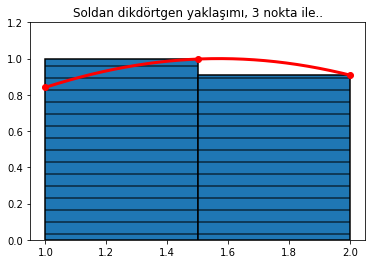

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle,Polygon

def f(x):
    f = np.sin(x)
    return f

x0 = 1
x1 = 2

t = np.linspace(x0,x1,1000)
t2 = f(t)

N = 3

x = np.linspace(x0,x1,N)
delta_x = x[1]-x[0]
y = f(x)

fig,ax = plt.subplots()
plt.plot(t,t2,"-r",linewidth=3)
plt.plot(x,y,"or")
for i in range(N-1):
    dik4sag = Rectangle([x[i],0],delta_x,y[i+1],hatch="-",linewidth=1.5,edgecolor="k")
    ax.add_patch(dik4sag)
plt.title("Soldan dikdörtgen yaklaşımı, {:} nokta ile..".format(N))
#plt.xlim(0.5,2.5)
plt.ylim(0,1.2)
plt.show()

Bu sefer de, 1. aralıkta gerçek değerden fazla, 2. aralıkta gerçek değerin altında bir değer hesaplamış olduk. Şansa pek güven olmayacağından, iki yaklaşım arasında bir yol tutalım: yani bir aralık için, aralığın solundaki değerden sağındaki değere bir doğru çizip, böylelikle yamuk tanımlayalım (bu kadar düzgün ve net tanımlı bir çokgene _yamuk_ adı verilir mi hiç?!):

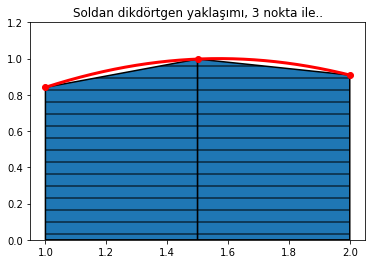

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle,Polygon

def f(x):
    f = np.sin(x)
    return f

x0 = 1
x1 = 2

t = np.linspace(x0,x1,1000)
t2 = f(t)

N = 3

x = np.linspace(x0,x1,N)
delta_x = x[1]-x[0]
y = f(x)

fig,ax = plt.subplots()
plt.plot(t,t2,"-r",linewidth=3)
plt.plot(x,y,"or")
for i in range(N-1):
    poli = Polygon([[x[i],0],[x[i],y[i]],[x[i+1],y[i+1]],[x[i+1],0]],hatch="-",linewidth=1.5,edgecolor="k")
    ax.add_patch(poli)
plt.title("Soldan dikdörtgen yaklaşımı, {:} nokta ile..".format(N))
#plt.xlim(0.5,2.5)
plt.ylim(0,1.2)
plt.show()

Görüldüğü üzere, iki aralık için de hesaplanan değer gerçek değerin altında kalsa da (bu, altta/üstte kalış fonksiyona bağlı bu arada), yukarıdaki ikisine göre, hata miktarımız (yani kırmızı gerçek değerle mavi yaklaşım arasında kalan beyaz bölgelerin alanı) aşırı derece de azalmış durumda. 

Bu yaklaşımlar çok daha rafine hale getirilebilir, matematikte bu tür eldeki verilerin aralarını doldurma işlemlerine "içdeğer bulma, _enterpolasyon_" (*Interpolation*) denmekte. İlk aklıma gelen, güzeller güzeli Newton-Rhapson yöntemi ile sekant yöntemleri oluyor ama taban genişliğini yeterince düşük tuttuğumuz sürece integralimizi yamuklarla da epey iyi hassasiyetle alabiliriz.

## Örnek: $\int_a^b{\cos(x)\,dx}\stackrel{?}{=}\sin(b)-\sin(a)$

Farklı aralıklar alıp, yamuk alanlarının toplamıyla  $\int_a^b{\cos(x)\,dx}$ integralini verilen $[a,b]$ aralığında hesaplayalım:

In [13]:
import numpy as np
import time

a = 0
b = np.pi /3

def f(x):
    return np.cos(x)

gercek_deger = np.sin(b) - np.sin(a)

for N in np.array([5,10,50,100,1000,10000,1000000]):
    # N : aralığı kaç parçaya böldüğümüz
    x = np.linspace(a,b,N)
    delta_x = x[1]-x[0]
    y = f(x)
    
    alan = 0
    zaman_basla = time.time()
    for i in range(N-1):
        alan = alan + delta_x * 0.5 * (y[i+1] + y[i])
    zaman_bitis = time.time()
    zaman_hesap = zaman_bitis - zaman_basla
    print("Bölüm Sayısı: {:}".format(N))
    print("Hesaplanan Değer: {:.15f}".format(alan))
    print("    Gerçek Değer: {:.15f}".format(gercek_deger))
    print("            Hata: {:.15f}".format(np.abs(alan-gercek_deger)))
    print("    Hesap Süresi: {:.15f} sn".format(zaman_hesap))
    print("-"*45)

Bölüm Sayısı: 5
Hesaplanan Değer: 0.861073373783770
    Gerçek Değer: 0.866025403784439
            Hata: 0.004952030000668
    Hesap Süresi: 0.000019788742065 sn
---------------------------------------------
Bölüm Sayısı: 10
Hesaplanan Değer: 0.865048122417347
    Gerçek Değer: 0.866025403784439
            Hata: 0.000977281367092
    Hesap Süresi: 0.000028848648071 sn
---------------------------------------------
Bölüm Sayısı: 50
Hesaplanan Değer: 0.865992441464719
    Gerçek Değer: 0.866025403784439
            Hata: 0.000032962319719
    Hesap Süresi: 0.000114202499390 sn
---------------------------------------------
Bölüm Sayısı: 100
Hesaplanan Değer: 0.866017328886492
    Gerçek Değer: 0.866025403784439
            Hata: 0.000008074897947
    Hesap Süresi: 0.000218391418457 sn
---------------------------------------------
Bölüm Sayısı: 1000
Hesaplanan Değer: 0.866025324483988
    Gerçek Değer: 0.866025403784439
            Hata: 0.000000079300451
    Hesap Süresi: 0.0021841526031

## Otomatik yapanı yok mu bunun? (`scipy.integrate.quad()`)
Doğal olarak, bu integral işi yamukları kullanmak yerine çok daha optimize yapan prosedürler mevcut (SciPy altında, koskoca [integrate](https://docs.scipy.org/doc/scipy/reference/integrate.html) modülü. Bunlardan en yaygın ve kolay kullanımı olan [`scipy.integrate.quad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html)ı ele alacağız:

In [14]:
from scipy import integrate

a = 0
b = np.pi /3

def f(x):
    return np.cos(x)

gercek_deger = np.sin(b) - np.sin(a)
zaman_basla = time.time()
alan,hassasiyet = integrate.quad(f,a,b)
zaman_bitis = time.time()
zaman_hesap = zaman_bitis - zaman_basla

print("           Hesaplanan Değer: {:.15f}".format(alan))
print("               Gerçek Değer: {:.15f}".format(gercek_deger))
print("                       Hata: {:.15f}".format(np.abs(alan-gercek_deger)))
print("Integrate'in öngördüğü hata: {:.15f}".format(hassasiyet))
print("               Hesap Süresi: {:.15f} sn".format(zaman_hesap))
print("-"*50)

           Hesaplanan Değer: 0.866025403784439
               Gerçek Değer: 0.866025403784439
                       Hata: 0.000000000000000
Integrate'in öngördüğü hata: 0.000000000000010
               Hesap Süresi: 0.000182151794434 sn
--------------------------------------------------


# Türevler
Genelde türev almak integral almaya göre her zaman daha basittir; bilgisayarlarda ise... bilgisayarlarda da daha basit, korkmayın. ;)

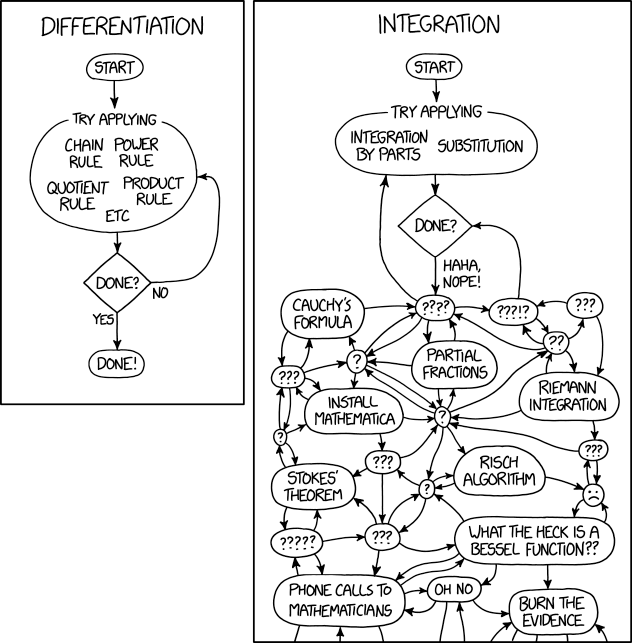

[xkcd - Differentiation and Integration](https://xkcd.com/2117/) ["Symbolic integration" is when you theatrically go through the motions of finding integrals, but the actual result you get doesn't matter because it's purely symbolic.]

## Türevin formal/resmi tanımı
Hatırlarsanız, matematiksel formasyonda türev şu şekilde tanımlanmakta idi: 
$$\lim_{\Delta x\rightarrow 0}{\left[\frac{f(x+\Delta x)-f(x)}{\Delta x}\right]} = \frac{\text{d}f}{\text{d}x}$$

Halk dilinde ise (onunla ilgili karikatürü koyamıyorum, biraz ayıp ;), "ben şimdi şunu biraz arttırırsam, bu ne kadar artar?" sorusunun cevabı olarak tanımlıyoruz türevi.

Yukarıdaki (formal olan) tanımı kodda ifade edip, $x=\pi/3$ noktasında $\sin(x)$ fonksiyonun türevini bulalım:

In [15]:
import numpy as np

def f(x):
    return np.sin(x)

x = np.pi/3

delta_x = 1E-6

turev_x = (f(x+delta_x) - f(x)) / delta_x

gercek_deger = np.cos(x)

print("Hesaplanan değer: {:.15f}".format(turev_x))
print("    Gerçek Değer: {:.15f}".format(gercek_deger))
print("            Hata: {:.15f}".format(np.abs(turev_x-gercek_deger)))

Hesaplanan değer: 0.499999566971887
    Gerçek Değer: 0.500000000000000
            Hata: 0.000000433028113


Tabii ki, aralığı ne kadar küçük tutarsak (yukarıda $10^{-6}$ aldık bu arada, _1E-6_ o demek), gerçek değere de o kadar yaklaşacağımız bariz, burada o faktörü tekrardan değerlendirmeyeceğiz ama şu faktöre bir bakalım (bakalım koddaki farkı fark edebilecek misiniz?)

In [16]:
import numpy as np

def f(x):
    return np.sin(x)

x = np.pi/3

delta_x = 1E-6

turev_x = (f(x) - f(x-delta_x)) / delta_x

gercek_deger = np.cos(x)

print("Hesaplanan değer: {:.15f}".format(turev_x))
print("    Gerçek Değer: {:.15f}".format(gercek_deger))
print("            Hata: {:.15f}".format(np.abs(turev_x-gercek_deger)))


Hesaplanan değer: 0.500000432945846
    Gerçek Değer: 0.500000000000000
            Hata: 0.000000432945846


Yapmış olduğumuz şey şu: türev madem ki fonksiyonun verilen noktasında fonksiyona teğet geçen doğrunun eğimi, doğruyu tanımlamak için de iki tane noktamız olması gerekiyor, işte o iki noktayı nasıl seçtiğimiz bize kalmış: ilk uygulamada, doğruyu çizmek için verilen nokta ile ondan $\Delta x$ kadar ilerisindeki noktayı kullanırken; ikinci uygulamada verilen nokta ile onun $\Delta x$ kadar gerisindeki noktayı kullandık. 

Grafiksel olarak şu iki doğrunun eğimlerini aldık yani:

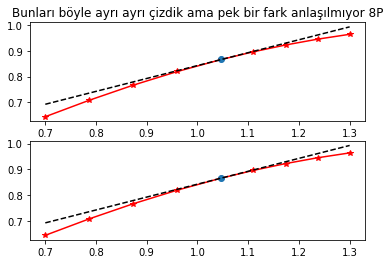

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

x = np.pi/3

delta_x = 1E-6

t = np.concatenate((np.linspace(0.7,x,5),np.linspace(x,1.3,5)))
y = f(t)

turev_0 = (f(x+delta_x)-f(x)) / delta_x
turev_1 = (f(x) - f(x-delta_x)) / delta_x

delta_y0 = f(x)-turev_0*x
delta_y1 = f(x)-turev_1*x


fig,ax = plt.subplots(2,1)

ax[0].plot(t,y,"*-r")
ax[0].plot(x,f(x),"o")
ax[0].plot(t,turev_0*t+delta_y0,"k--")

ax[1].plot(t,y,"*-r")
ax[1].plot(x,f(x),"o")
ax[1].plot(t,turev_1*t+delta_y1,"k--")
ax[0].title.set_text("Bunları böyle ayrı ayrı çizdik ama pek bir fark anlaşılmıyor 8P")
plt.show()

Bu durumda da, aklımıza, integralde de gelen, _iki yaklaşımın ortası_ geliyor, yani, türevi seçili noktanın $\Delta x$ kadar ilerisi ya da gerisi ile hesaplamak yerine, hem ilerideki hem de gerideki noktaları işin içine katıp, şu şekilde hesaplamak:

$$f'(x) = \frac{f(x+\Delta x) - f(x-\Delta x)}{2\Delta x}$$

(aralığın $\Delta x$'den $2\Delta x$'e çıktığına dikkat edin..)

## Otomatik yapanı yok mu bunun? (`scipy.misc.derivative()`)
Doğal olarak, bu türev işini de yapan prosedürler mevcut, örneğin: [`scipy.misc.derivative`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html):

In [19]:
import numpy as np
from scipy.misc import derivative

def f(x):
    return np.sin(x)

x = np.pi/3
df_dx = derivative(f,x,dx=1E-6)
gercek_deger = np.cos(x)

print("           Hesaplanan Değer: {:.15f}".format(df_dx))
print("               Gerçek Değer: {:.15f}".format(gercek_deger))
print("                       Hata: {:.15f}".format(np.abs(df_dx-gercek_deger)))

           Hesaplanan Değer: 0.499999999958867
               Gerçek Değer: 0.500000000000000
                       Hata: 0.000000000041133


Ama çok bariz bir işlem olduğu için, integral'deki incelikleri, varyasyonları beklemeyin... Bildiğiniz şekilde alıyor bu arkadaş.

# Ödev (Rutin Grup Ödevi)

$$f'(x) = \frac{f(x+\Delta x) - f(x-\Delta x)}{2\Delta x}$$ 

yaklaşımını kullanarak $[-\pi,\pi]$ aralığında $\cos(x)$ grafiğini $\sin(x)$'in türevini hesaplamak yoluyla çizdirin.

# 10000 Puanlık Kişisel Bonus Ödev / "Challenge"
(Kişisel olarak yapılacak, doğru gönderen ilk kişiye gidecek)
$\lambda$ düzgün çizgisel yük dağılımına sahip, $R$ yarıçaplı, çember şeklindeki bir iletkenin iç bölgesinde, merkezden $r$ uzaklıktaki bir noktadaki elektrik alanı hesaplayın.